In [1]:
#importing of data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/(ongoing)kickstarter project/ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
# shape of dataset
print(f'rows : {df.shape[0]}')
print(f'columns : {df.shape[1]}')

rows : 378661
columns : 15


In [5]:
# statistical info about dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


In [6]:
# dropping of ID and name
df.drop(['ID','name','usd pledged'], axis=1, inplace=True)

In [7]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00


In [8]:
# to check any nan values
df.isna().sum()

category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [9]:
# no na values 

In [10]:
# exploratory data analyis and visualization

In [11]:
# object and num cols
ob_cols=[x for x in df.columns if df[x].dtype=='object']
print(ob_cols)
num_cols=[x for x in df.columns if (df[x].dtype=='int64')|(df[x].dtype=='float64')]
print(num_cols)

['category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']
['goal', 'pledged', 'backers', 'usd_pledged_real', 'usd_goal_real']


In [12]:
# countplots of categorical columns except deadline and launched  

In [13]:
# top 15 categories
top15cat=df['category'].value_counts()[:15]
top15cat

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Video Games       11830
Food              11493
Film & Video      10108
Fiction            9169
Fashion            8554
Nonfiction         8318
Art                8253
Apparel            7166
Theater            7057
Technology         6930
Name: category, dtype: int64

In [14]:
pct_cat=top15cat/len(df)*100
pct_cat

Product Design    5.892870
Documentary       4.262124
Music             4.153319
Tabletop Games    3.744774
Shorts            3.263341
Video Games       3.124166
Food              3.035169
Film & Video      2.669406
Fiction           2.421427
Fashion           2.259013
Nonfiction        2.196688
Art               2.179522
Apparel           1.892458
Theater           1.863672
Technology        1.830133
Name: category, dtype: float64

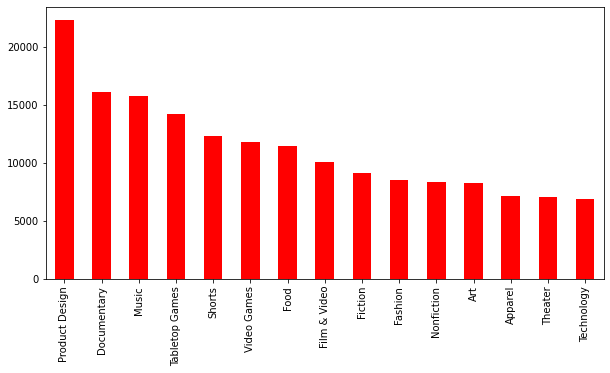

In [15]:
top15cat.plot.bar(color='r', figsize=(10,5))

product design,documetary and music are at the top of number of kickstarters in the dataset

In [16]:
# top main categories
top_maincat=df['main_category'].value_counts()
top_maincat

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [17]:
pct_maincat=top_maincat/len(df)*100
pct_maincat

Film & Video    16.792065
Music           13.710945
Publishing      10.530263
Games            9.304101
Technology       8.601097
Design           7.941140
Art              7.434882
Food             6.497104
Fashion          6.025442
Theater          2.881997
Comics           2.857173
Photography      2.846610
Crafts           2.326355
Journalism       1.255741
Dance            0.995085
Name: main_category, dtype: float64

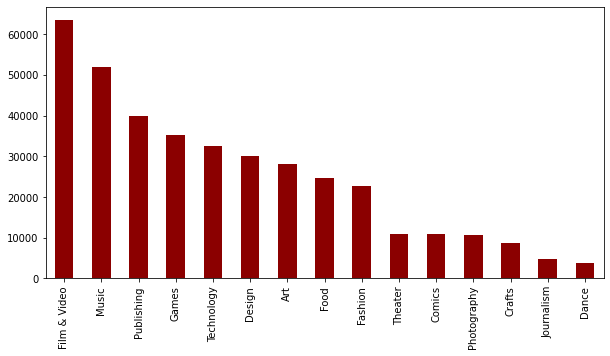

In [18]:
top_maincat.plot.bar(color='darkred', figsize=(10,5))

film & videos, music and publishing are at the top in the list of number of kickstarters.

In [19]:
# currency count
curr=df['currency'].value_counts()
curr

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [20]:
pct_curr=curr/len(df)*100
pct_curr

USD    78.002488
GBP     9.013867
EUR     4.596460
CAD     3.951292
AUD     2.099503
SEK     0.472190
MXN     0.462683
NZD     0.389530
DKK     0.298156
CHF     0.202820
NOK     0.190672
HKD     0.163207
SGD     0.146569
JPY     0.010564
Name: currency, dtype: float64

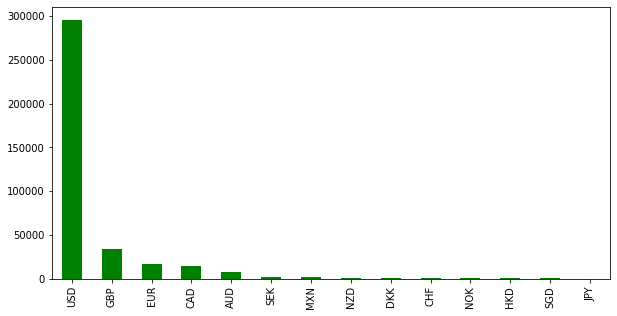

In [21]:
curr.plot.bar(color='g', figsize=(10,5))

~80% of kickstarters have currency exchange in USD

In [22]:
# status of kickstarter
status=df['state'].value_counts()
status

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [23]:
pct_stat=status/len(df)
pct_stat

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

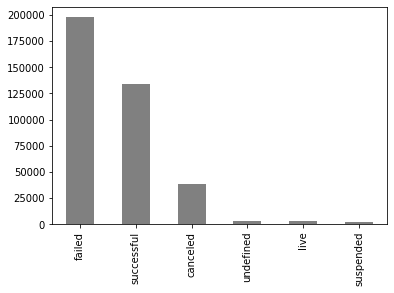

In [24]:
status.plot.bar(color='gray')

more than 50% of the kickstarters are failure

In [25]:
# countries to which kickstarters belong
cntry=df['country'].value_counts()
cntry

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [26]:
pct_cntry=cntry/len(df)
pct_cntry

US      0.772794
GB      0.088924
CA      0.038969
AU      0.020702
DE      0.011015
N,0"    0.010027
FR      0.007762
IT      0.007600
NL      0.007574
ES      0.006011
SE      0.004640
MX      0.004627
NZ      0.003821
DK      0.002939
IE      0.002142
CH      0.002010
NO      0.001870
HK      0.001632
BE      0.001629
AT      0.001577
SG      0.001466
LU      0.000164
JP      0.000106
Name: country, dtype: float64

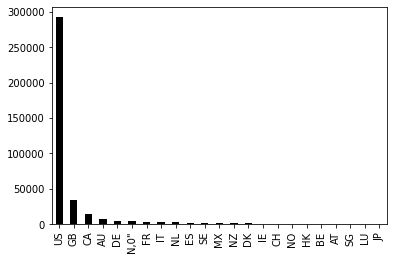

In [27]:
cntry.plot.bar(color='black')

more than 75 % of kickstarters are from USA

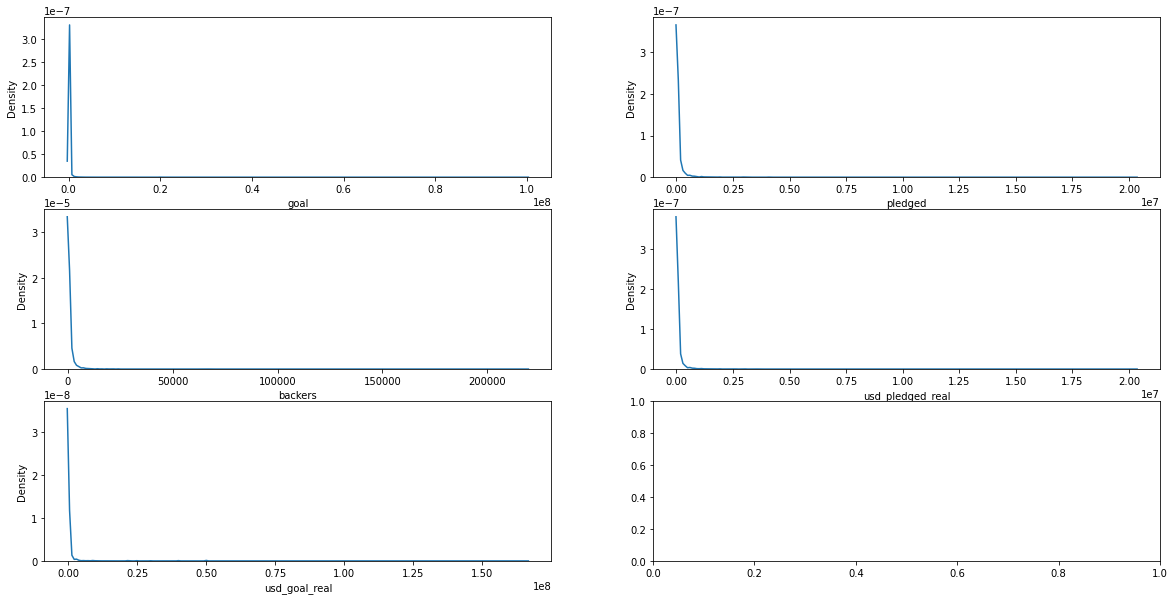

In [28]:
# distribution plots of numerical columns

fig, axes=plt.subplots(3,2, figsize=(20,10))
for i,j in enumerate(num_cols):
  ax=axes[int(i/2), i%2]
  sns.kdeplot(df[j], ax=ax)

Not much info from the distribution plots beacuse they are pretty skewed

In [29]:
df.head(2)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00


In [30]:
# main category with goal usd
mcat_goalusd=df.groupby('main_category')['usd_goal_real'].sum().sort_values(ascending=False)
mcat_goalusd

main_category
Film & Video    5.253729e+09
Technology      3.331436e+09
Games           1.582708e+09
Design          1.259073e+09
Food            1.206473e+09
Art             1.103558e+09
Publishing      9.888050e+08
Music           7.980919e+08
Fashion         5.113615e+08
Journalism      4.089461e+08
Theater         2.956149e+08
Comics          2.117433e+08
Photography     1.322243e+08
Crafts          9.191721e+07
Dance           3.612882e+07
Name: usd_goal_real, dtype: float64

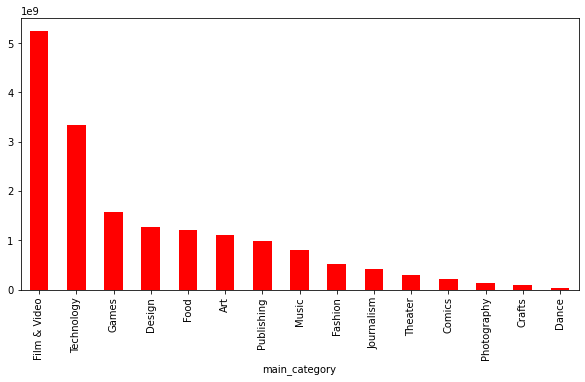

In [31]:
mcat_goalusd.plot.bar(color='r', figsize=(10,5))

Film & video has goal with highest amount 

In [32]:
# status with goals
stat_goals=df.groupby('state')['usd_goal_real'].sum().sort_values(ascending=False)
stat_goals

state
failed        1.249085e+10
canceled      2.930894e+09
successful    1.276983e+09
suspended     3.234340e+08
live          1.750363e+08
undefined     1.461496e+07
Name: usd_goal_real, dtype: float64

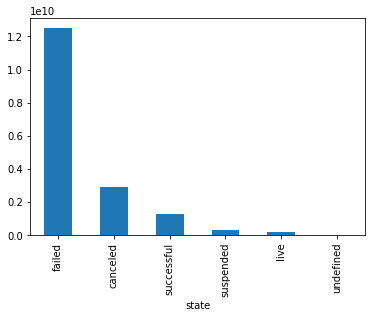

In [33]:
stat_goals.plot.bar()

In [34]:
# country with goals
count_goals=df.groupby('country')['usd_goal_real'].sum().sort_values(ascending=False)
count_goals

country
US      1.288582e+10
GB      1.440290e+09
CA      6.552910e+08
AU      4.555105e+08
NL      3.140662e+08
DE      3.136943e+08
FR      2.381982e+08
IT      2.268088e+08
CH      2.064454e+08
ES      1.196695e+08
SE      7.202677e+07
NO      4.774773e+07
DK      3.960204e+07
IE      3.844625e+07
NZ      3.700340e+07
AT      2.665748e+07
MX      2.605212e+07
BE      2.302780e+07
N,0"    1.935447e+07
HK      1.474895e+07
SG      8.588454e+06
LU      2.094555e+06
JP      6.638767e+05
Name: usd_goal_real, dtype: float64

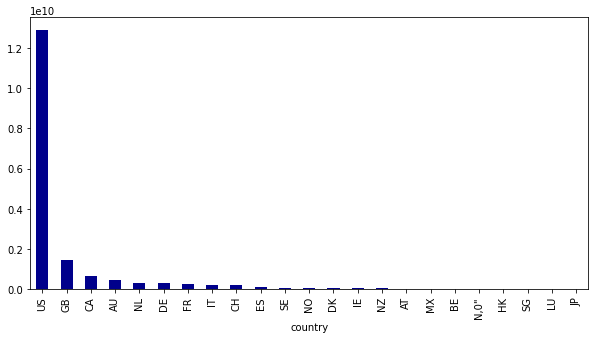

In [35]:
count_goals.plot.bar(color='darkblue', figsize=(10,5))

In [36]:
# most of the kickstarters are from usa it will be obvious that most amount of goals are in USA

In [37]:
# success rate of categories
div_0=df[df['state']=='successful']
div_0.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.00,50000.00
6,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.00,1000.00
11,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.00,12500.00
14,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,GB,121857.33,6469.73
18,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,7,US,250.00,250.00


In [38]:
div_0['main_category'].value_counts()/len(df)*100

Music           6.390148
Film & Video    6.238562
Games           3.305859
Publishing      3.248288
Art             3.039658
Design          2.786133
Theater         1.725554
Technology      1.699145
Food            1.606978
Comics          1.542805
Fashion         1.477047
Photography     0.872812
Dance           0.617439
Crafts          0.558547
Journalism      0.267258
Name: main_category, dtype: float64

In [39]:
# music category has the highest success rate after that film and video.

In [40]:
# feature engineering

In [41]:
# new features
# deadline
df['d_day']=pd.to_datetime(df['deadline'], format='%Y/%m/%d').dt.day
# launched
df['l_day']=pd.to_datetime(df['launched'], format='%Y/%m/%d').dt.day
df.head(2)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,d_day,l_day
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,9,11
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,1,2


In [42]:
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [43]:
df.head(2)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,d_day,l_day
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,9,11
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,1,2


In [44]:
status={'failed':0, 'canceled':0, 'successful':1, 'live':0, 'undefined':0,
       'suspended':0}


In [45]:
status

{'canceled': 0,
 'failed': 0,
 'live': 0,
 'successful': 1,
 'suspended': 0,
 'undefined': 0}

In [46]:
df['state']=df['state'].map(status)

In [47]:
df['state']

0         0
1         0
2         0
3         0
4         0
         ..
378656    0
378657    0
378658    0
378659    0
378660    0
Name: state, Length: 378661, dtype: int64

In [48]:
# preprocessing of dataset

In [49]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,d_day,l_day
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,1533.95,9,11
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,1,2
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,26,12
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,16,17
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,19500.00,29,4


In [50]:
# we will drop category, deadline launched columns
df.drop(['category','deadline','launched'], axis=1, inplace=True)

In [51]:
df.head()

,main_category,currency,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,d_day,l_day
0,Publishing,GBP,1000.0,0.0,0,0,GB,0.0,1533.95,9,11
1,Film & Video,USD,30000.0,2421.0,0,15,US,2421.0,30000.00,1,2
2,Film & Video,USD,45000.0,220.0,0,3,US,220.0,45000.00,26,12
3,Music,USD,5000.0,1.0,0,1,US,1.0,5000.00,16,17
4,Film & Video,USD,19500.0,1283.0,0,14,US,1283.0,19500.00,29,4


In [52]:
# one hot encoding of categorical columns
mcat=pd.get_dummies(df[['main_category']])
crcy=pd.get_dummies(df[['currency']])
ctry=pd.get_dummies(df[['country']])

df_new=pd.concat([df,mcat,crcy,ctry], axis=1)

In [53]:
df_new.head(2)

,main_category,currency,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,d_day,l_day,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,Publishing,GBP,1000.0,0.0,0,0,GB,0.0,1533.95,9,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Film & Video,USD,30000.0,2421.0,0,15,US,2421.0,30000.00,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
df_new.drop(['main_category','currency','country'], axis=1, inplace=True)

In [55]:
df_new.head(2)

,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,d_day,l_day,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0.0,0,0,0.0,1533.95,9,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30000.0,2421.0,0,15,2421.0,30000.00,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

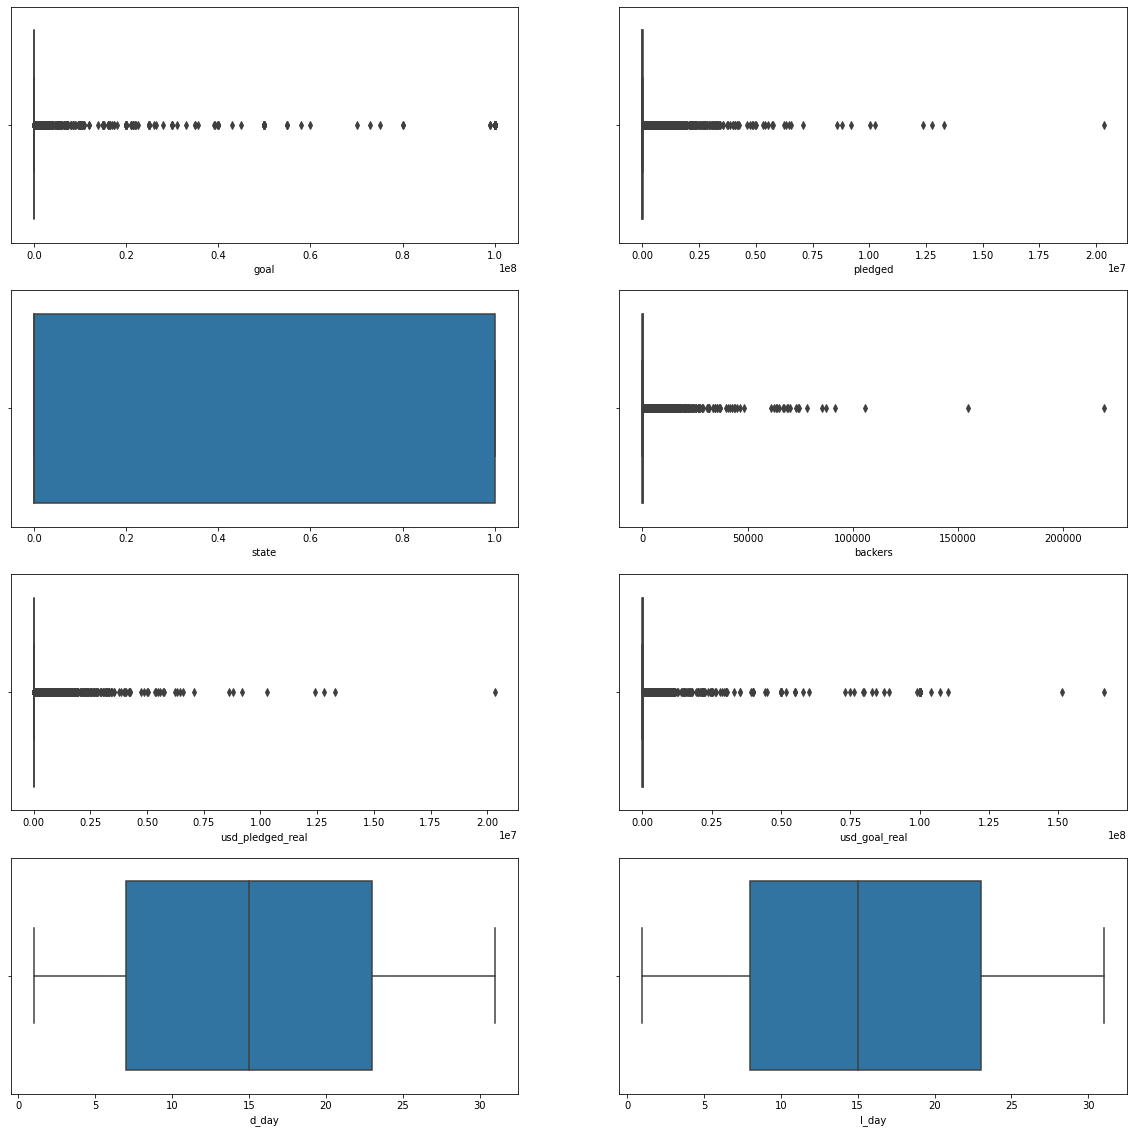

In [56]:
# boxplots for outliers

box=['goal','pledged','state','backers','usd_pledged_real','usd_goal_real','d_day','l_day']
fig, axes=plt.subplots(4,2, figsize=(20,20))
for i,j in enumerate(box):
  ax=axes[int(i/2), i%2]
  sns.boxplot(df_new[j], ax=ax)



In [90]:
# outliers
df_new=df_new[df_new['goal']<=0.8e8]
df_new=df_new[df_new['pledged']<=1.5e7]
df_new=df_new[df_new['usd_pledged_real']<=1.5e7]
df_new=df_new[df_new['usd_goal_real']<=1.25e8]
df_new.shape

(378622, 60)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

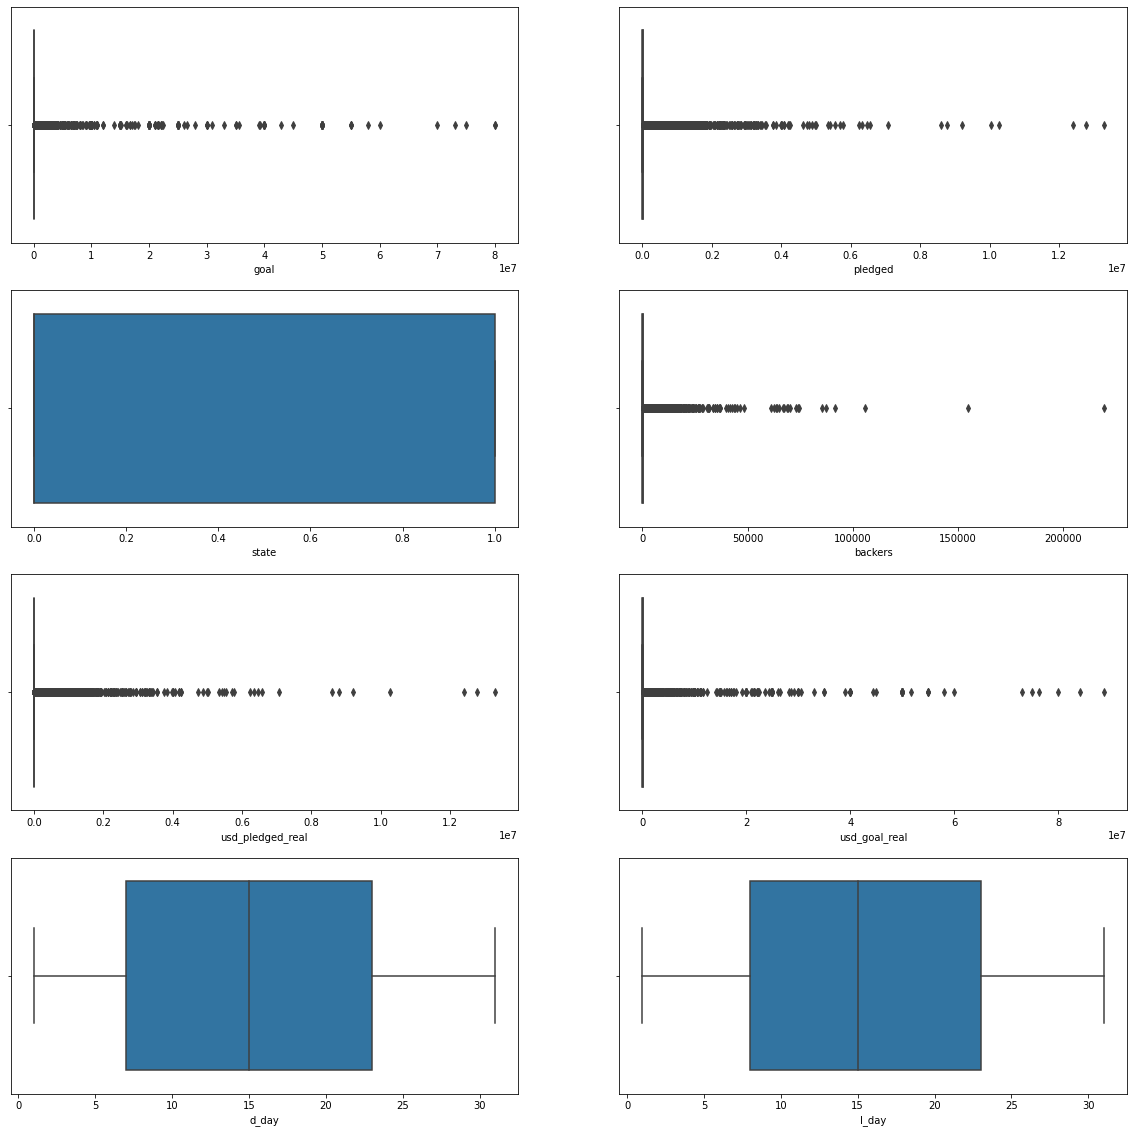

In [91]:
# after outliers boxplots
box=['goal','pledged','state','backers','usd_pledged_real','usd_goal_real','d_day','l_day']
fig, axes=plt.subplots(4,2, figsize=(20,20))
for i,j in enumerate(box):
  ax=axes[int(i/2), i%2]
  sns.boxplot(df_new[j], ax=ax)

In [93]:
y=df_new['state']
X=df_new.drop('state', axis=1)

In [94]:
print(y.shape)
print(X.shape)

(378622,)
(378622, 59)


In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
to_change=['goal','pledged','backers','usd_pledged_real','usd_goal_real','d_day','l_day']
X[to_change]=scaler.fit_transform(X[to_change])

In [97]:
X.head()

,goal,pledged,backers,usd_pledged_real,usd_goal_real,d_day,l_day,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,-0.060254,-0.107297,-0.117363,-0.106246,-0.055833,-0.695321,-0.487545,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.014335,-0.080323,-0.100664,-0.077685,-0.010200,-1.580647,-1.509292,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.009416,-0.104846,-0.114023,-0.103651,0.013846,1.185997,-0.374017,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.053921,-0.107286,-0.116250,-0.106234,-0.050276,0.079339,0.193620,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.030961,-0.093002,-0.101777,-0.091111,-0.027032,1.517994,-1.282237,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
# model building

In [98]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [99]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(265035, 59)
(265035,)
(113587, 59)
(113587,)


In [100]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X_train,y_train)
y_pred_lor=lor.predict(X_test)
score_lor=cross_val_score(lor, X,y, cv=5)
print(score_lor)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.93826345 0.93567514 0.93595161 0.93710052 0.9375099 ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [101]:
score_lor.mean()

0.936900126938372

In [102]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
report_lor=classification_report(y_test,y_pred_lor)
print(report_lor)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     73356
           1       0.96      0.86      0.90     40231

    accuracy                           0.94    113587
   macro avg       0.94      0.92      0.93    113587
weighted avg       0.94      0.94      0.93    113587



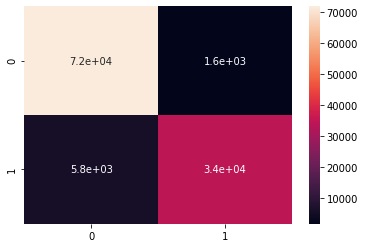

In [103]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred_lor)
sns.heatmap(cm, annot=True)

0.9173152679393521


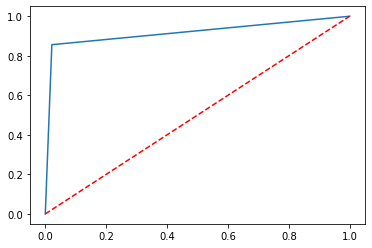

In [104]:
# roc auc curve
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold=roc_curve(y_test,y_pred_lor)
roc_score=auc(fpr,tpr)
print(roc_score)
plt.plot(fpr,tpr, label = 'AUC = %0.2f' % roc_score)
plt.plot([0,1],[0,1], 'r--')

In [105]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
score_dtc=cross_val_score(dtc, X,y, cv=5)
print(score_dtc)

[0.98955431 0.98931661 0.98993714 0.99005599 0.99020126]


In [110]:
score_dtc.mean()

0.9898130609293896

In [106]:
# randomforest 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
score_rfc=cross_val_score(rfc, X,y, cv=5)
print(score_rfc)

[0.99352922 0.99381974 0.99356875 0.99375363 0.9936876 ]


In [107]:
report_rfc=classification_report(y_test,y_pred_rfc)
print(report_rfc)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     73356
           1       0.98      1.00      0.99     40231

    accuracy                           0.99    113587
   macro avg       0.99      0.99      0.99    113587
weighted avg       0.99      0.99      0.99    113587



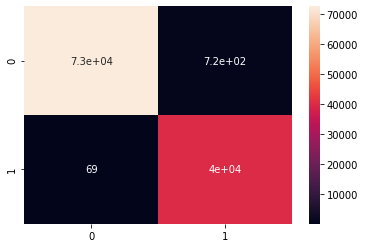

In [108]:
# confusion matrix
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm_rfc, annot=True)

0.9942007979400178


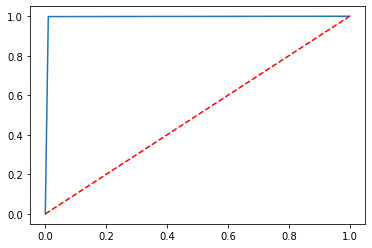

In [109]:
# roc auc curve
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold=roc_curve(y_test,y_pred_rfc)
roc_score=auc(fpr,tpr)
print(roc_score)
plt.plot(fpr,tpr, label = 'AUC = %0.2f' % roc_score)
plt.plot([0,1],[0,1], 'r--')